<a href="https://colab.research.google.com/github/Gaurav0771/Ml-Tutorials/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-1cc2d718c834>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Accuracy: 0.61
Confusion Matrix:
 [[682 315]
 [310 296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.69       997
           1       0.48      0.49      0.49       606

    accuracy                           0.61      1603
   macro avg       0.59      0.59      0.59      1603
weighted avg       0.61      0.61      0.61      1603



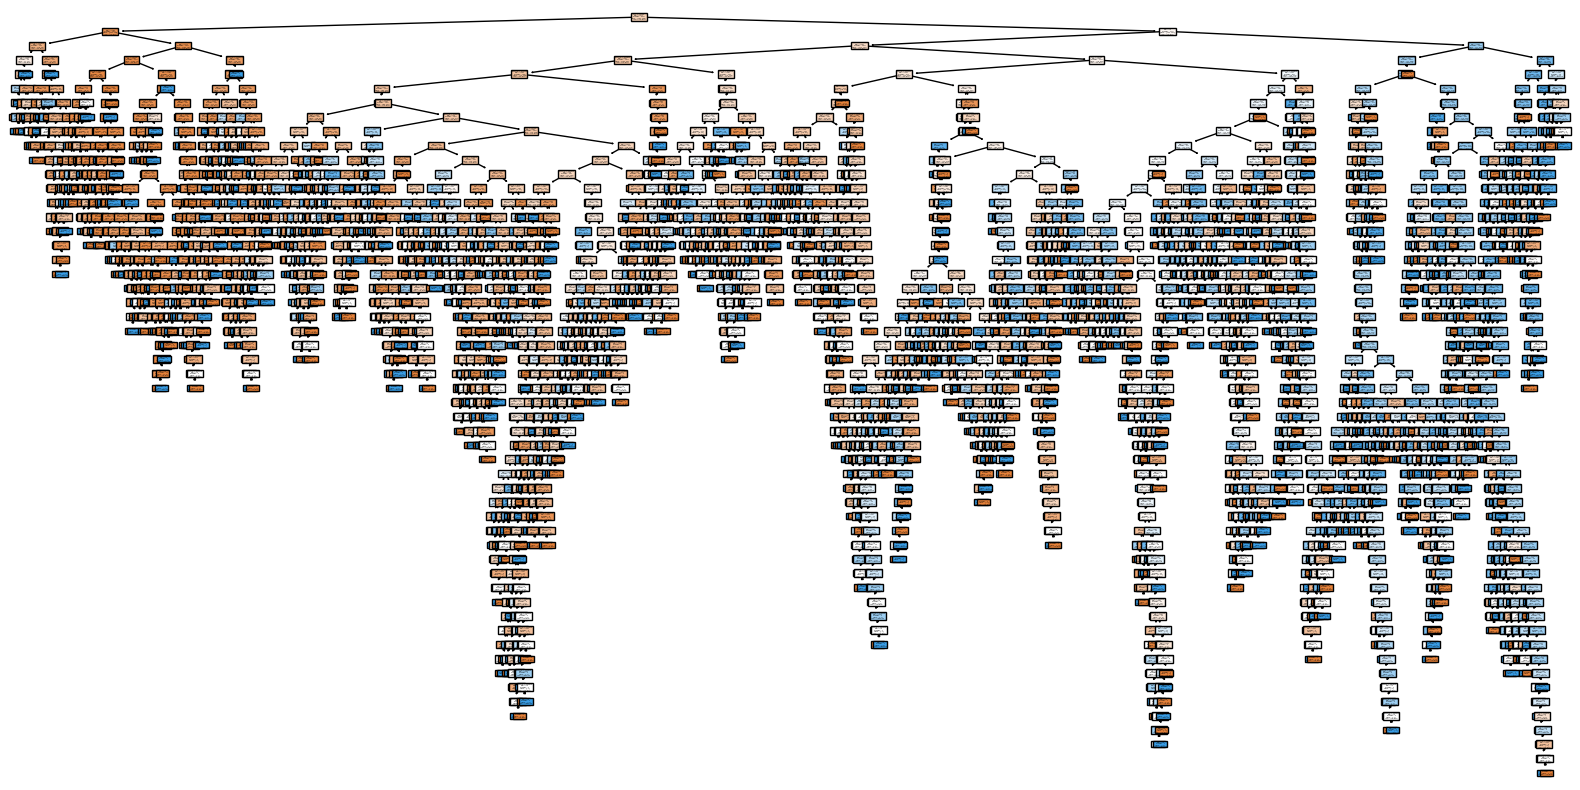

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/cars_24_combined.csv')  # Replace with your dataset file path

# Handle missing values by imputing with the mean
df.fillna(df.mean(), inplace=True)

# Define a threshold for high and low prices
price_threshold = 600000  # Adjust as needed

# Create a binary target variable (1 for High Price, 0 for Low Price)
df['Price_Class'] = df['Price'].apply(lambda x: 1 if x >= price_threshold else 0)

# Select features and target variable
X = df[['Year', 'Distance', 'Owner']]
y = df['Price_Class']

# Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=['Low Price', 'High Price'], filled=True)
plt.show()
